In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely as sl

import spideymaps as sm
from spideymaps import Spideymap, SpideyAtlas, render_map

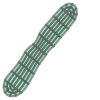

In [2]:
label_file = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms\2023-08-05_fcl136_20ms_001_seg.npy"
labels = np.load(label_file, allow_pickle=True).item()['masks']
mask = labels == 1

locs_file = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms\2023-08-07 palmari output\2023-08-05_fcl136_20ms_001.locs"
locs = pd.read_csv(locs_file, index_col=0)
locs['y_px'] = locs['x'] / 0.049
locs['x_px'] = locs['y'] / 0.049

map = Spideymap(bimage=mask, coords=locs, xcol='x_px', ycol='y_px')
map.make_grid(radius=10, n_shells=3, n_cols=8, n_phi=(1,3,5,7))
sl.GeometryCollection(list(map.polygons.values()))

In [3]:
map.count()

In [4]:
atlas = SpideyAtlas(maps=(map, map), map_names=('numero1', 'numero2'))

In [5]:
atlas.sum()
atlas.sum(data_key='areas')
atlas.add_symmetric_elements(data_key='counts_sum')
atlas.add_symmetric_elements(data_key='areas_sum')
atlas.density(num_key='counts_sum_sym', den_key='areas_sum_sym')
atlas.data.keys()

dict_keys(['counts_sum', 'areas_sum', 'counts_sum_sym', 'areas_sum_sym', 'counts_sum_sym_per_areas_sum_sym'])

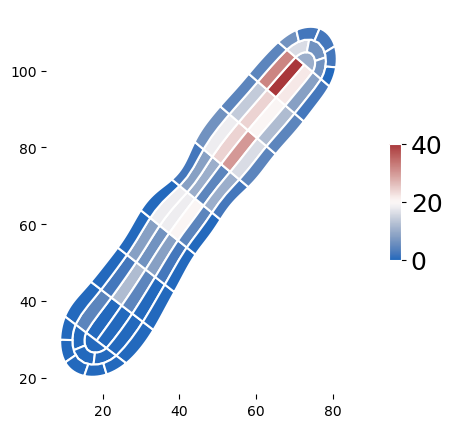

In [6]:
fig, ax = render_map(
    atlas.maps['numero1'].polygons, 
    atlas.data['counts_sum'], 
    vmin=None, 
    vmax=None, 
    cmap=None)
# ax.plot(map.coords['x_px'], map.coords['y_px'], 'o', mec='none', c='black', alpha=0.75, ms=2)

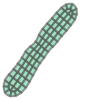

In [7]:
map = Spideymap(bimage=mask)
map.make_grid(radius=10, n_shells=2, n_cols=13, n_phi=(2,5))
sl.GeometryCollection(list(map.polygons.values()))

In [8]:
from glob import glob
from os.path import join

In [37]:
labels_folder = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms"
labels_pattern = r"*.npy"
labels_files = glob(join(labels_folder, labels_pattern))

coords_folder = r"T:\MIGRATED\Lab_Members\Daniel_Foust\Data\RNA-DNA Hybrids\FCL136 fenA-PAmCherry del(polA)\2023-08-05_fcl136_20ms\2023-08-07 palmari output"
coords_pattern = r"*.locs"
coords_files = glob(join(coords_folder, coords_pattern))

maps = []

for i_mov, (label_file, coords_file) in enumerate(zip(labels_files, coords_files)):
    labels = np.load(label_file, allow_pickle=True).item()['masks']
    coords = pd.read_csv(coords_file, index_col=0)
    coords['i_mov'] = i_mov
    n_rois = labels.max()

    for i_roi in range(1, n_rois+1):
        cell_bool = labels == i_roi
        coords_cell = coords[coords['rois']==i_roi].reset_index()
        coords_cell['x_px'] = coords_cell['y'] / 0.049
        coords_cell['y_px'] = coords_cell['x'] / 0.049
        map = Spideymap(bimage=cell_bool, coords=coords_cell, xcol='x_px', ycol='y_px')
        map.make_grid(radius=10, n_shells=5, n_cols=12, n_phi=(1,3,5,7,9))
        map.count()
        maps.append(map)

In [38]:
atlas = SpideyAtlas(maps)

In [59]:
atlas.create_rep_grid(grid_params=dict(radius=10, n_shells=5, n_cols=12, n_phi=(1,3,5,7,9)))

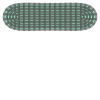

In [60]:
sl.GeometryCollection(list(atlas.rep_grid.values()))

In [67]:
atlas.sum()
atlas.sum(data_key='areas')
atlas.add_symmetric_elements()
atlas.add_symmetric_elements(data_key='areas_sum')
atlas.density(num_key='counts_sum_sym', den_key='areas_sum_sym');

In [68]:
atlas.data.keys()

dict_keys(['counts_sum', 'counts_sum_sym', 'areas_sum', 'areas_sum_sym', 'counts_sum_sym_per_areas_sum_sym'])

In [62]:
len(atlas.rep_grid)

170

In [63]:
len(atlas.data['counts_sum_sym'])

170

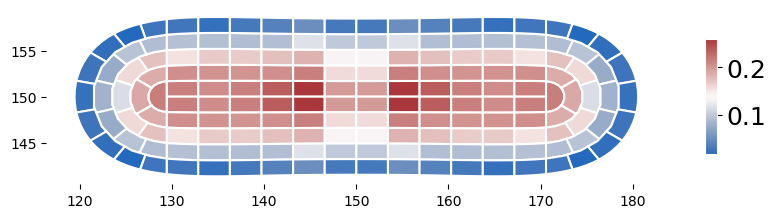

In [69]:
fig, ax = render_map(
    atlas.rep_grid, 
    atlas.data['counts_sum_sym_per_areas_sum_sym'], 
    vmin=None, 
    vmax=None, 
    cmap=None)

In [42]:
data.groupby(['i_r', 'i_l', 'i_p']).size()

i_r  i_l  i_p 
0.0  0.0   1.0    191
     1.0  -1.0    180
           0.0    203
     2.0  -1.0    184
           0.0    208
     3.0  -1.0    200
           0.0    256
     4.0  -1.0    216
           0.0    250
     5.0  -1.0    312
           0.0    291
     6.0  -1.0    399
           0.0    398
     7.0  -1.0    393
           0.0    363
     8.0  -1.0    406
           0.0    377
     9.0   1.0    326
1.0  0.0   1.0    234
           2.0    163
     1.0  -1.0    116
           0.0    166
     2.0  -1.0    138
           0.0    173
     3.0  -1.0    153
           0.0    192
     4.0  -1.0    132
           0.0    193
     5.0  -1.0    217
           0.0    235
     6.0  -1.0    281
           0.0    283
     7.0  -1.0    282
           0.0    289
     8.0  -1.0    257
           0.0    336
     9.0   1.0    407
           2.0    280
2.0  0.0   1.0     71
           2.0     92
           3.0     54
     1.0  -1.0     34
           0.0     54
     2.0  -1.0     48
           0.0   